In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [143]:
Update_data = pd.read_excel('Update_data.xlsx')
# Set the index
Update_data.set_index('Date', inplace=True) 

In [144]:
Update_data.index

DatetimeIndex(['2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00',
               ...
               '2023-12-30 00:00:00', '2023-12-30 01:00:00',
               '2023-12-30 02:00:00', '2023-12-30 03:00:00',
               '2023-12-30 04:00:00', '2023-12-30 05:00:00',
               '2023-12-30 06:00:00', '2023-12-30 07:00:00',
               '2023-12-30 08:00:00', '2023-12-30 09:00:00'],
              dtype='datetime64[ns]', name='Date', length=26251, freq=None)

In [145]:
# Check the shape of the dataset
Update_data.shape 

(26251, 14)

In [146]:
# Check the columns of the dataset
Update_data.columns 

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)',
       'rain (mm)', 'et0_fao_evapotranspiration (mm)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)',
       'direct_radiation (W/m²)', 'FLT GEM Turb influent oneven'],
      dtype='object')

# Train/Test Split

In [160]:
# Split the data into train dataset, validation dataset, and test dataset
train_size = int(len(Update_data) * 0.7)
train_data = Update_data[:train_size]
test_data = Update_data[train_size:]

In [161]:
print(train_data.shape)
print(test_data.shape)

(18375, 14)
(7876, 14)


In [162]:
# Check the first few rows of the train dataset
train_data.head()


,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),direct_radiation (W/m²),FLT GEM Turb influent oneven
Date,,,,,,,,,,,,,,
2020-12-31 15:00:00,4.0,78,0.0,0.0,0.05,9.8,352,20.5,4.4,4.3,0.391,0.387,55,0.430411
2020-12-31 16:00:00,3.4,85,0.0,0.0,0.02,5.6,345,18.4,4.1,4.3,0.391,0.387,25,0.522836
2020-12-31 17:00:00,1.5,94,0.0,0.0,0.01,7.3,327,9.7,3.5,4.4,0.390,0.387,3,0.512069
2020-12-31 18:00:00,0.8,95,0.0,0.0,0.00,7.1,294,9.4,2.9,4.3,0.389,0.387,0,0.450545
2020-12-31 19:00:00,-0.1,97,0.0,0.0,0.00,8.4,290,10.4,2.3,4.2,0.388,0.387,0,0.405494


In [163]:
# Check the first few rows of the test dataset
test_data.head()

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),direct_radiation (W/m²),FLT GEM Turb influent oneven
Date,,,,,,,,,,,,,,
2023-02-05 06:00:00,6.4,90,0.0,0.0,0.00,15.5,266,25.6,6.3,7.0,0.361,0.353,0,0.388817
2023-02-05 07:00:00,6.7,92,0.7,0.7,0.00,18.4,281,30.6,6.3,7.0,0.369,0.353,0,0.394029
2023-02-05 08:00:00,6.8,89,0.1,0.1,0.01,26.6,341,45.0,6.4,6.9,0.370,0.353,0,0.384838
2023-02-05 09:00:00,5.9,86,0.0,0.0,0.02,21.9,343,45.7,6.1,6.9,0.369,0.353,4,0.406097
2023-02-05 10:00:00,6.4,84,0.0,0.0,0.04,22.3,339,37.4,6.2,6.8,0.369,0.353,49,0.404610


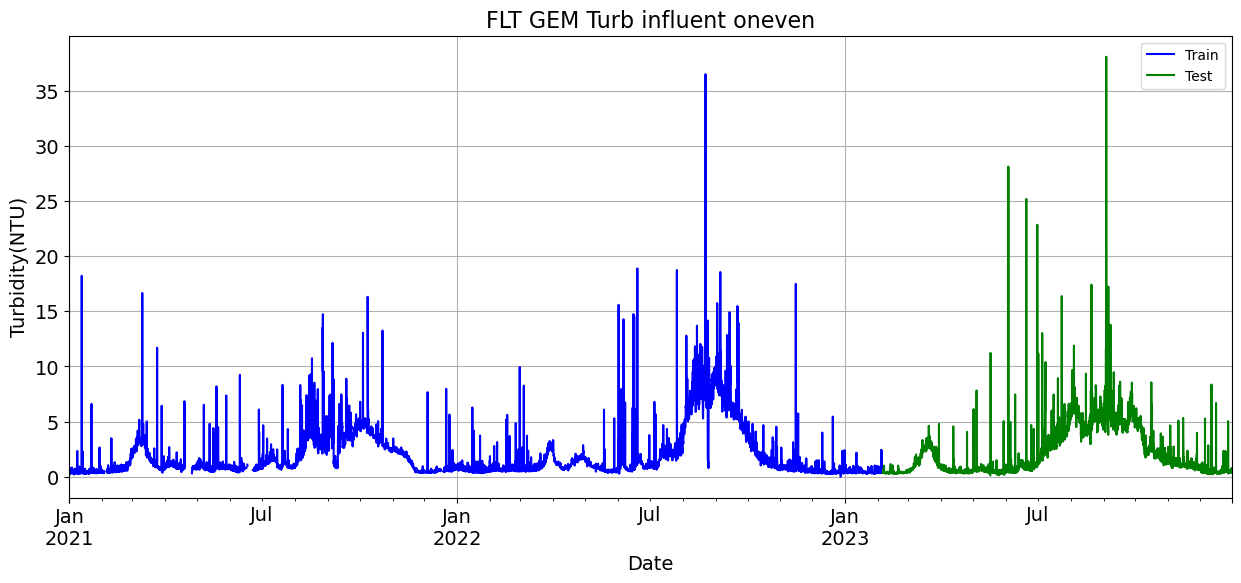

In [164]:
train_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, label='Train', color='blue')
test_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, label='Test', color='green')
plt.title('FLT GEM Turb influent oneven', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Turbidity(NTU)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Exploratory Analysis of Data

In [165]:
# Check the data types of the train dataset
train_data.dtypes

temperature_2m (°C)                float64
relative_humidity_2m (%)             int64
precipitation (mm)                 float64
rain (mm)                          float64
et0_fao_evapotranspiration (mm)    float64
wind_speed_10m (km/h)              float64
wind_direction_10m (°)               int64
wind_gusts_10m (km/h)              float64
soil_temperature_0_to_7cm (°C)     float64
soil_temperature_7_to_28cm (°C)    float64
soil_moisture_0_to_7cm (m³/m³)     float64
soil_moisture_7_to_28cm (m³/m³)    float64
direct_radiation (W/m²)              int64
FLT GEM Turb influent oneven       float64
dtype: object

In [166]:
# Statistics of the train dataset
train_data.describe()

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),rain (mm),et0_fao_evapotranspiration (mm),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),direct_radiation (W/m²),FLT GEM Turb influent oneven
count,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,18375.000000,17850.000000
mean,11.033671,78.013442,0.090335,0.087701,0.085182,13.650650,190.299048,25.685143,11.444947,11.463897,0.314691,0.308546,76.111401,1.845188
std,6.998967,15.739691,0.375577,0.370663,0.121870,7.217265,93.693673,12.997044,6.840815,5.993008,0.081988,0.078258,148.858802,2.141702
min,-9.100000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.800000,-4.800000,-0.400000,0.136000,0.153000,0.000000,0.000000
25%,5.800000,68.000000,0.000000,0.000000,0.000000,8.200000,112.000000,15.800000,6.100000,6.600000,0.258000,0.232000,0.000000,0.582456
50%,10.800000,82.000000,0.000000,0.000000,0.030000,12.300000,213.000000,23.400000,10.700000,10.800000,0.343000,0.331000,0.000000,0.921500
75%,16.100000,91.000000,0.000000,0.000000,0.110000,17.700000,254.000000,33.100000,16.600000,16.900000,0.378000,0.375000,73.000000,2.261897
max,37.000000,100.000000,13.000000,13.000000,0.790000,48.500000,360.000000,103.000000,33.800000,25.700000,0.447000,0.437000,788.000000,36.489292


In [167]:
# Check for missing values in the train dataset
train_data.isnull().sum()

temperature_2m (°C)                  0
relative_humidity_2m (%)             0
precipitation (mm)                   0
rain (mm)                            0
et0_fao_evapotranspiration (mm)      0
wind_speed_10m (km/h)                0
wind_direction_10m (°)               0
wind_gusts_10m (km/h)                0
soil_temperature_0_to_7cm (°C)       0
soil_temperature_7_to_28cm (°C)      0
soil_moisture_0_to_7cm (m³/m³)       0
soil_moisture_7_to_28cm (m³/m³)      0
direct_radiation (W/m²)              0
FLT GEM Turb influent oneven       525
dtype: int64

In [168]:
# Inpterpolate the missing values in the train dataset
Update_data['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)

C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_12644\2606194439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Update_data['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)


In [169]:
# Check for missing values in the test dataset
test_data.isnull().sum()

temperature_2m (°C)                0
relative_humidity_2m (%)           0
precipitation (mm)                 0
rain (mm)                          0
et0_fao_evapotranspiration (mm)    0
wind_speed_10m (km/h)              0
wind_direction_10m (°)             0
wind_gusts_10m (km/h)              0
soil_temperature_0_to_7cm (°C)     0
soil_temperature_7_to_28cm (°C)    0
soil_moisture_0_to_7cm (m³/m³)     0
soil_moisture_7_to_28cm (m³/m³)    0
direct_radiation (W/m²)            0
FLT GEM Turb influent oneven       0
dtype: int64

# Aggregate to other frequency

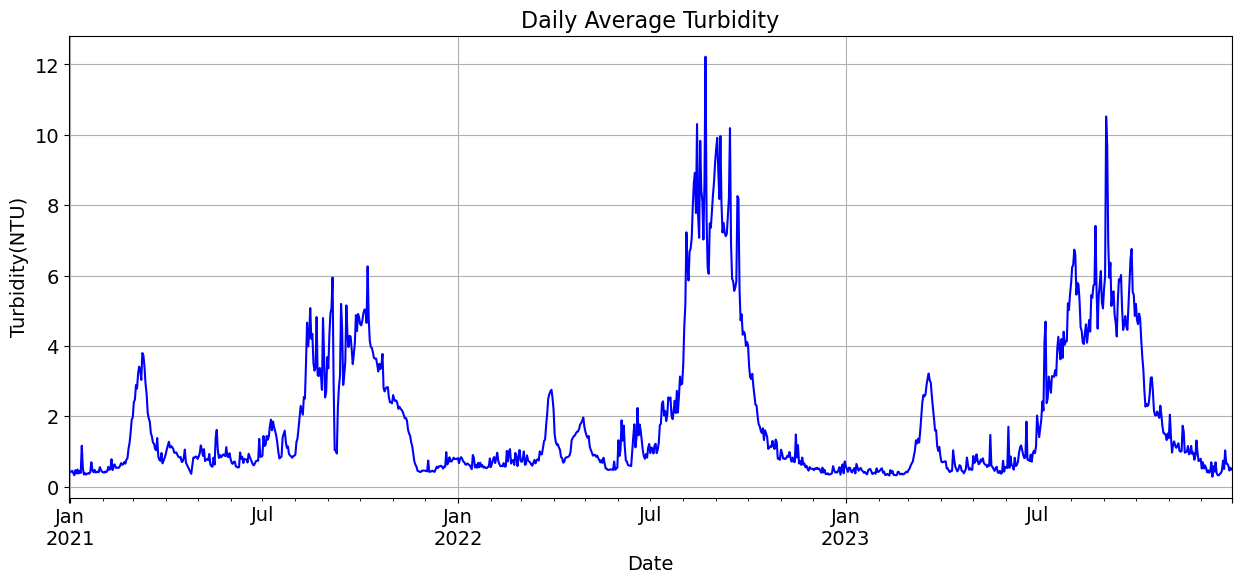

In [119]:
# Aggregate the data to daily frequency
daily_data = Update_data.resample('D').mean()
# Plot the daily data
daily_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, color='blue')
plt.title('Daily Average Turbidity', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Turbidity(NTU)', fontsize=14)
plt.grid()
plt.show()


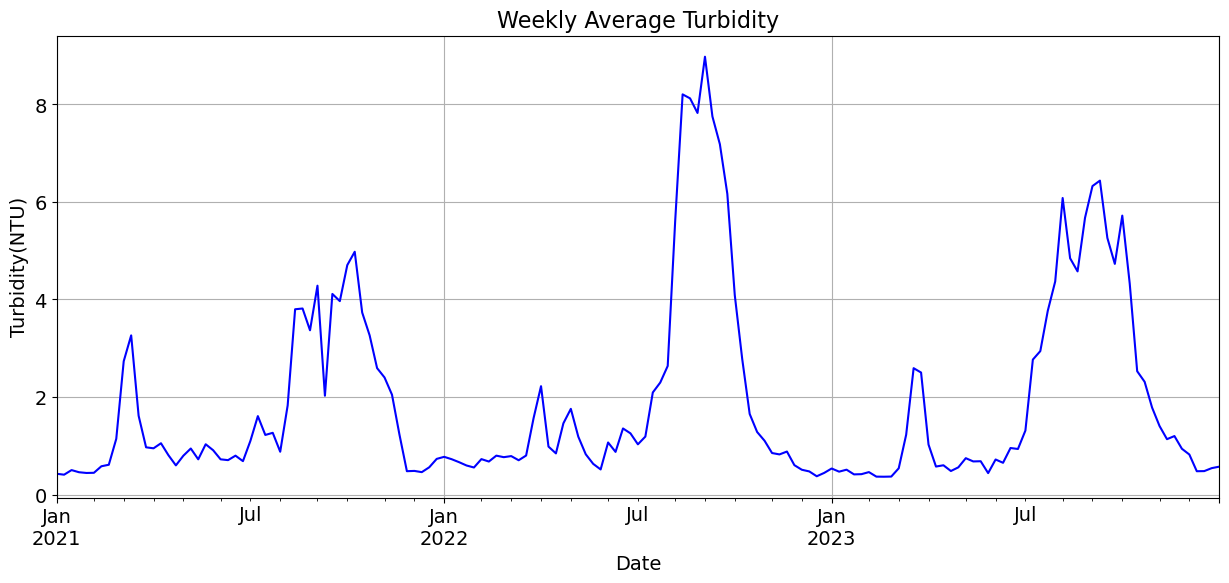

In [120]:
# Aggregate the data to weekly frequency
weekly_data = Update_data.resample('W').mean()
# Plot the weekly data
weekly_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, color='blue')
plt.title('Weekly Average Turbidity', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Turbidity(NTU)', fontsize=14)
plt.grid()
plt.show()


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_12644\1045453627.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = Update_data.resample('M').mean()


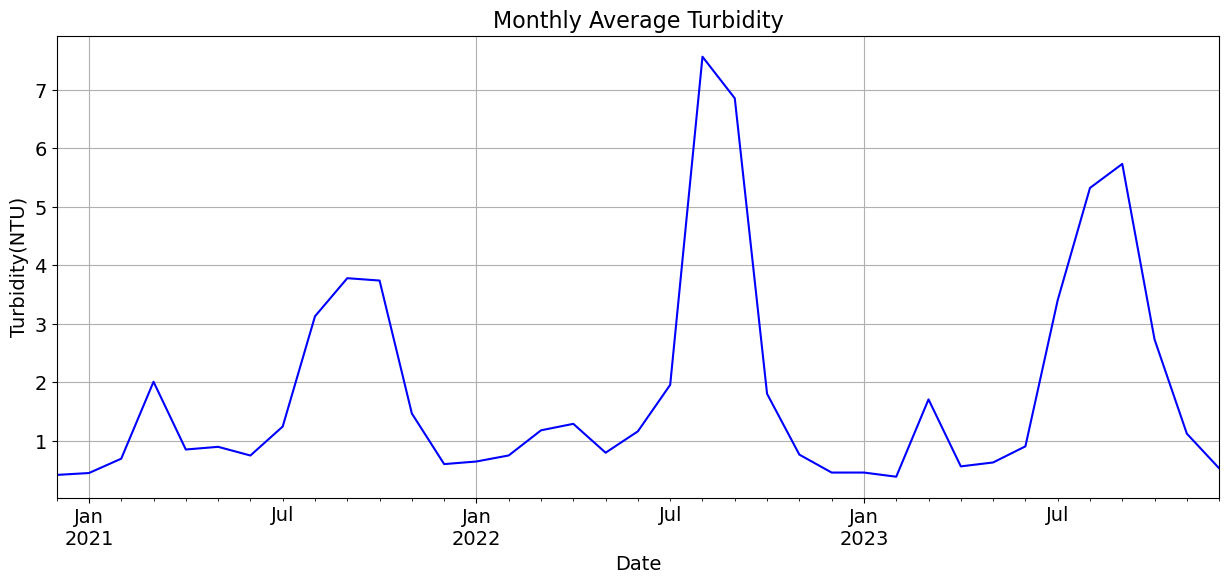

In [121]:
# Aggregate the data to monthly frequency
monthly_data = Update_data.resample('M').mean()
# Plot the monthly data
monthly_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, color='blue')
plt.title('Monthly Average Turbidity', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Turbidity(NTU)', fontsize=14)
plt.grid()
plt.show()


# Distribution of the data

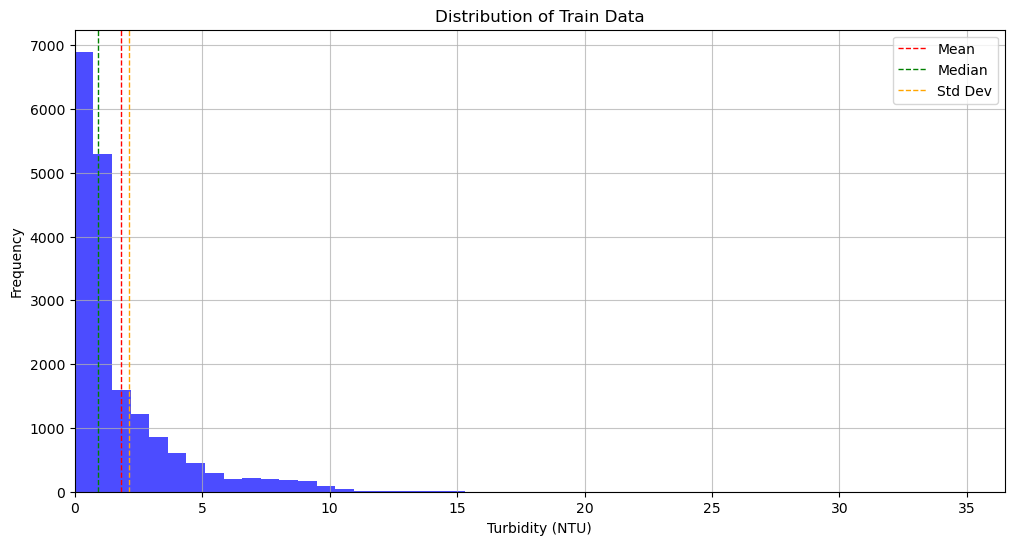

In [122]:
# Check the distribution of the train dataset
plt.figure(figsize=(12, 6))
plt.hist(train_data['FLT GEM Turb influent oneven'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Train Data')
plt.xlabel('Turbidity (NTU)')
plt.ylabel('Frequency')
plt.grid(alpha=0.75)
plt.axvline(train_data['FLT GEM Turb influent oneven'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(train_data['FLT GEM Turb influent oneven'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(train_data['FLT GEM Turb influent oneven'].std(), color='orange', linestyle='dashed', linewidth=1, label='Std Dev')
plt.xlim(train_data['FLT GEM Turb influent oneven'].min(), train_data['FLT GEM Turb influent oneven'].max())
plt.legend()
plt.show()

# Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix of Train Data')

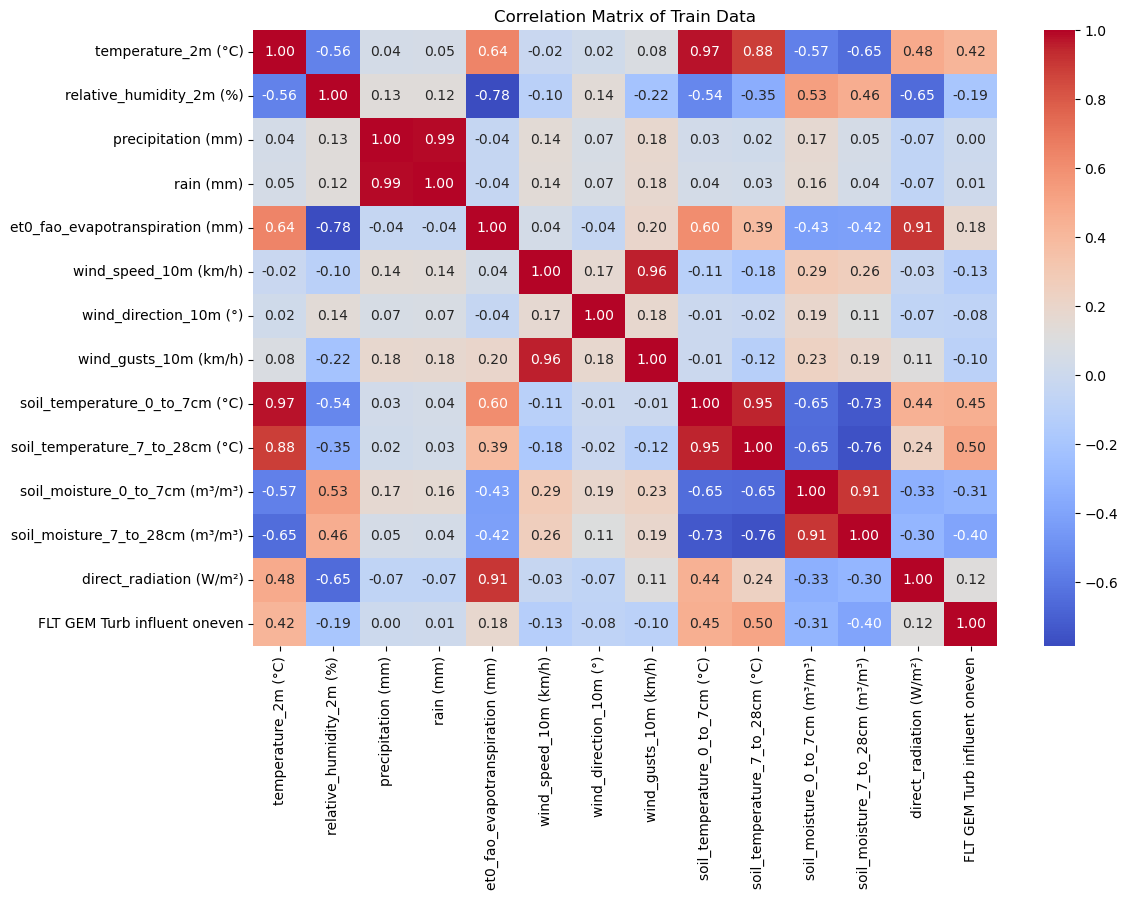

In [123]:
# Check the correlation matrix of the train dataset
train_data.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Train Data')


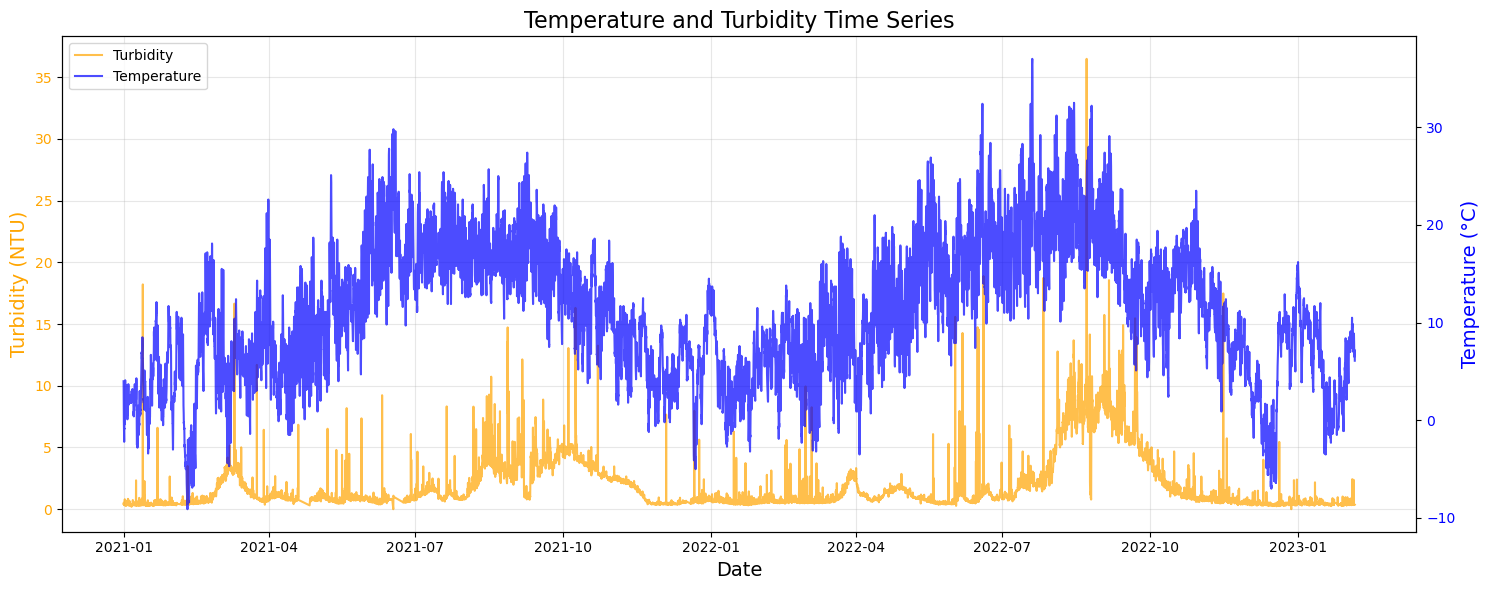

In [32]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='orange', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['temperature_2m (°C)'], alpha=0.7, color='blue', label='Temperature')
ax2.set_ylabel('Temperature (°C)', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legends
plt.title('Temperature and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


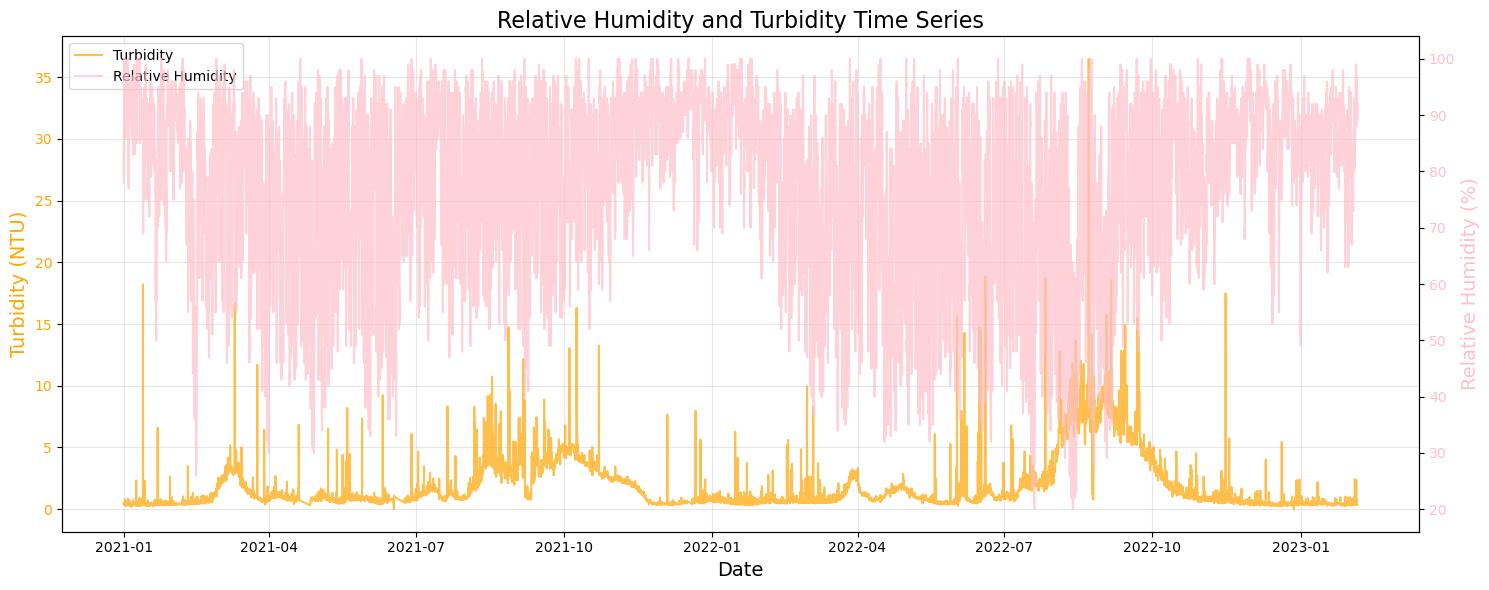

In [33]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='orange', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['relative_humidity_2m (%)'], alpha=0.7, color='Pink', label='Relative Humidity')
ax2.set_ylabel('Relative Humidity (%)', fontsize=14, color='Pink')
ax2.tick_params(axis='y', labelcolor='Pink')

# Add title and legends
plt.title('Relative Humidity and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()


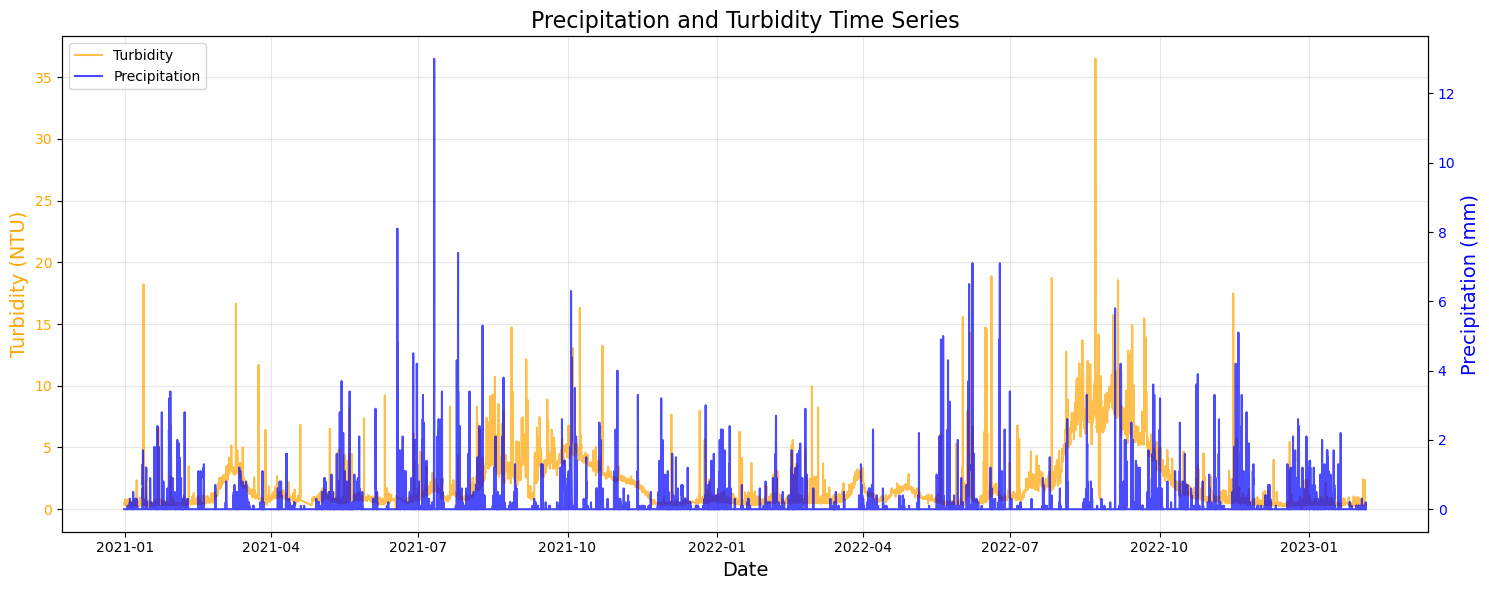

In [34]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='orange', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['precipitation (mm)'], alpha=0.7, color='blue', label='Precipitation')
ax2.set_ylabel('Precipitation (mm)', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legends
plt.title('Precipitation and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

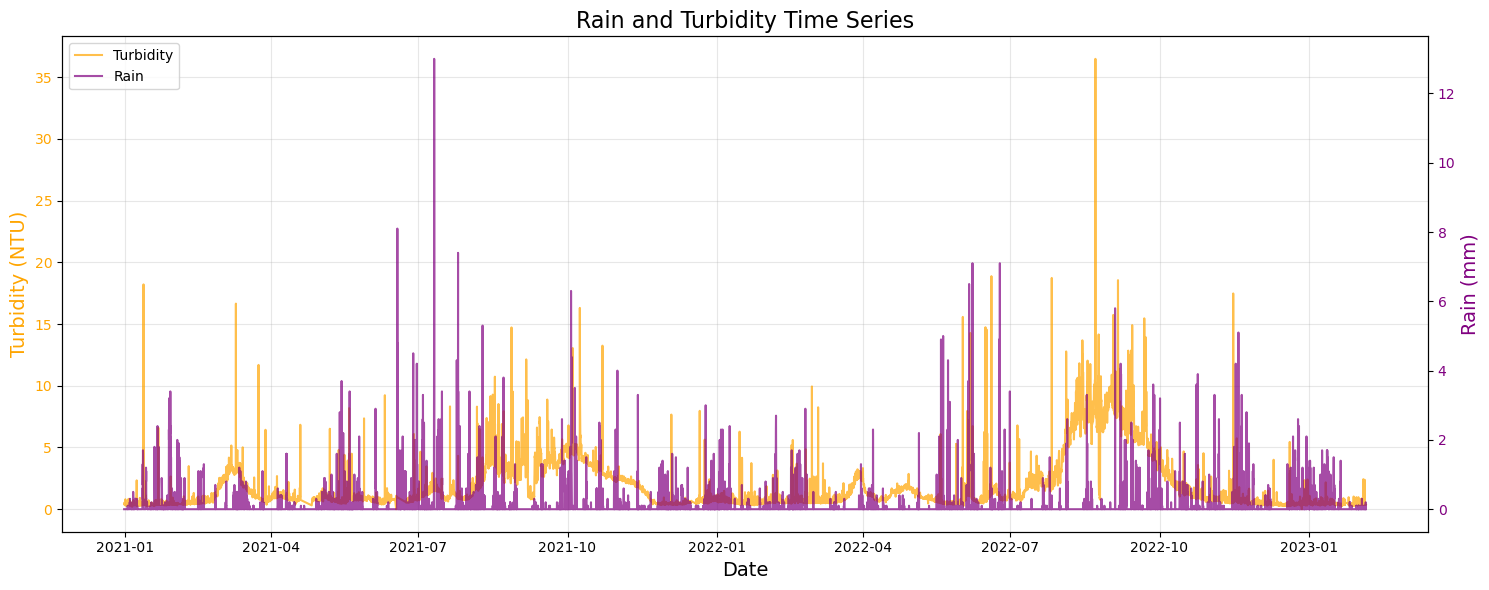

In [35]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='orange', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['rain (mm)'], alpha=0.7, color='Purple', label='Rain')
ax2.set_ylabel('Rain (mm)', fontsize=14, color='Purple')
ax2.tick_params(axis='y', labelcolor='Purple')

# Add title and legends
plt.title('Rain and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

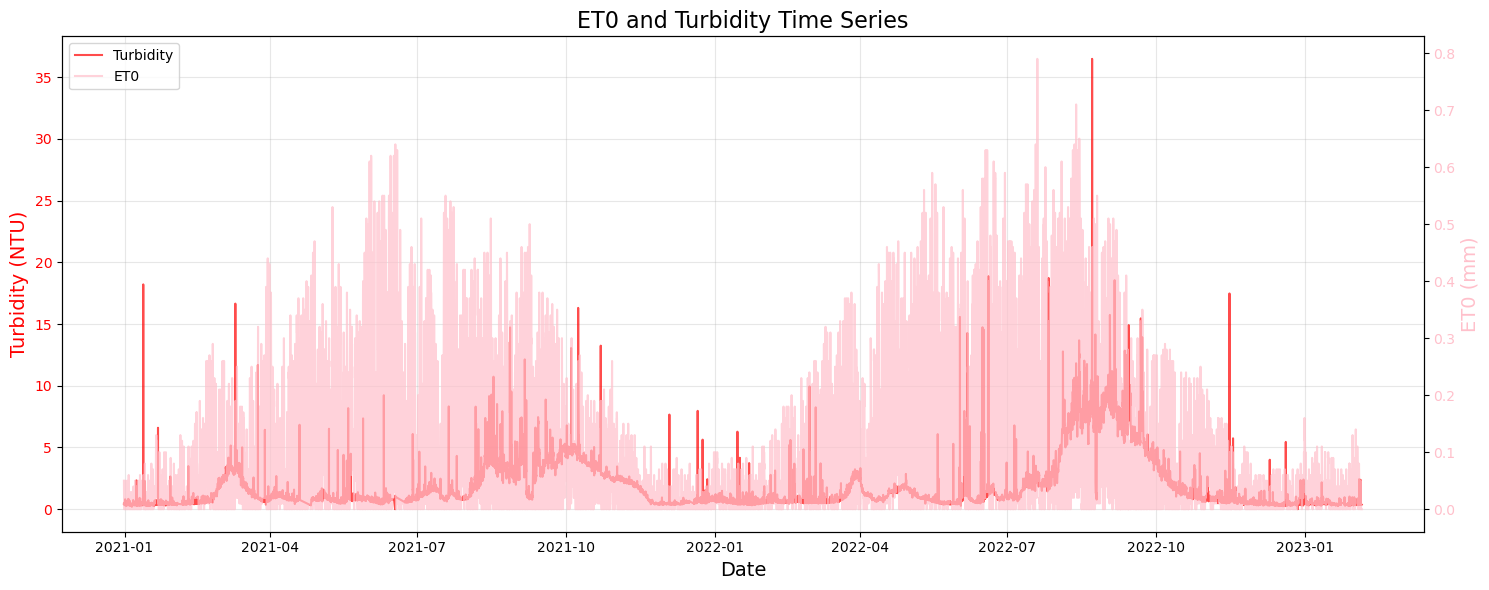

In [36]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['et0_fao_evapotranspiration (mm)'], alpha=0.7, color='pink', label='ET0')
ax2.set_ylabel('ET0 (mm)', fontsize=14, color='pink')
ax2.tick_params(axis='y', labelcolor='pink')

# Add title and legends
plt.title('ET0 and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

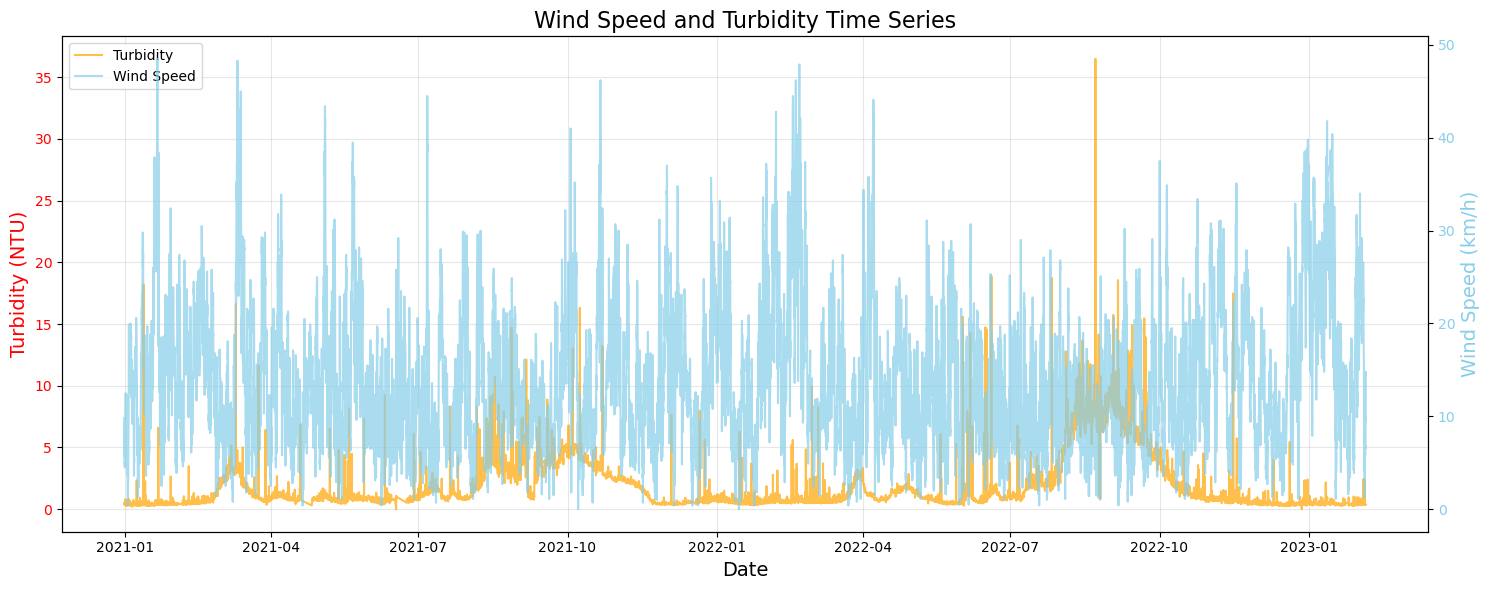

In [37]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='orange', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['wind_speed_10m (km/h)'], alpha=0.7, color='skyblue', label='Wind Speed')
ax2.set_ylabel('Wind Speed (km/h)', fontsize=14, color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Add title and legends
plt.title('Wind Speed and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

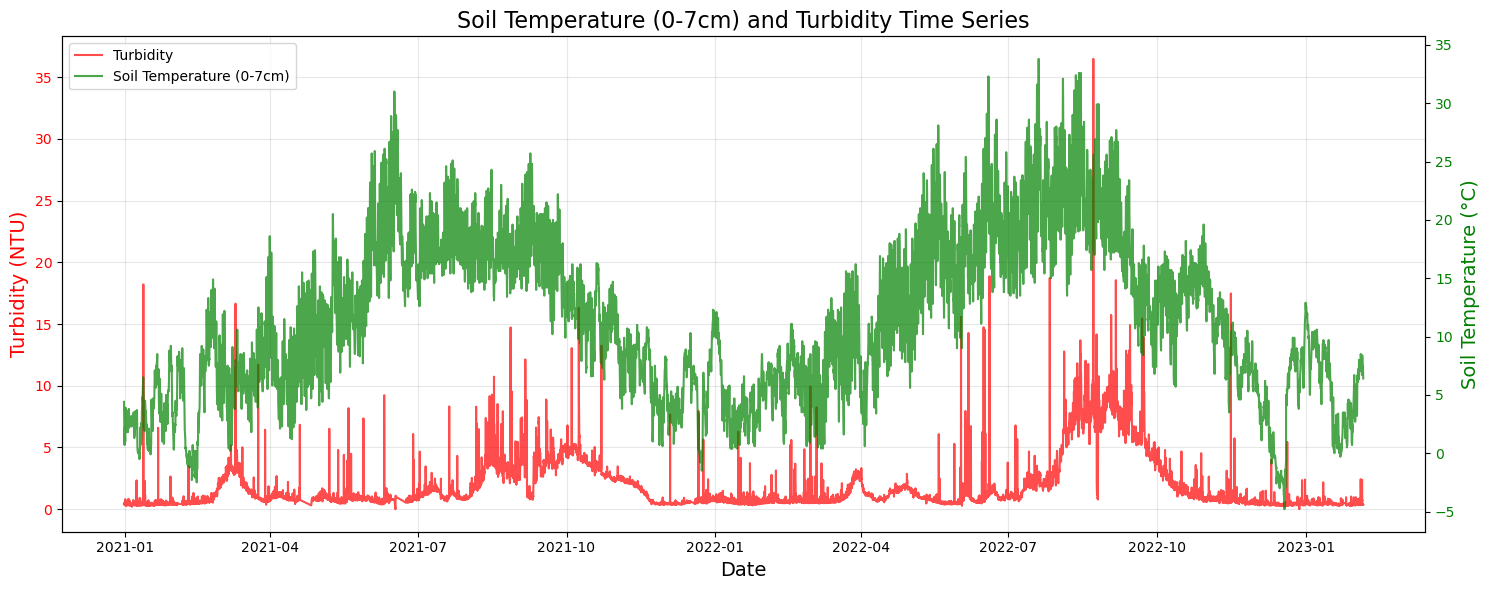

In [38]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['soil_temperature_0_to_7cm (°C)'], alpha=0.7, color='green', label='Soil Temperature (0-7cm)')
ax2.set_ylabel('Soil Temperature (°C)', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legends
plt.title('Soil Temperature (0-7cm) and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

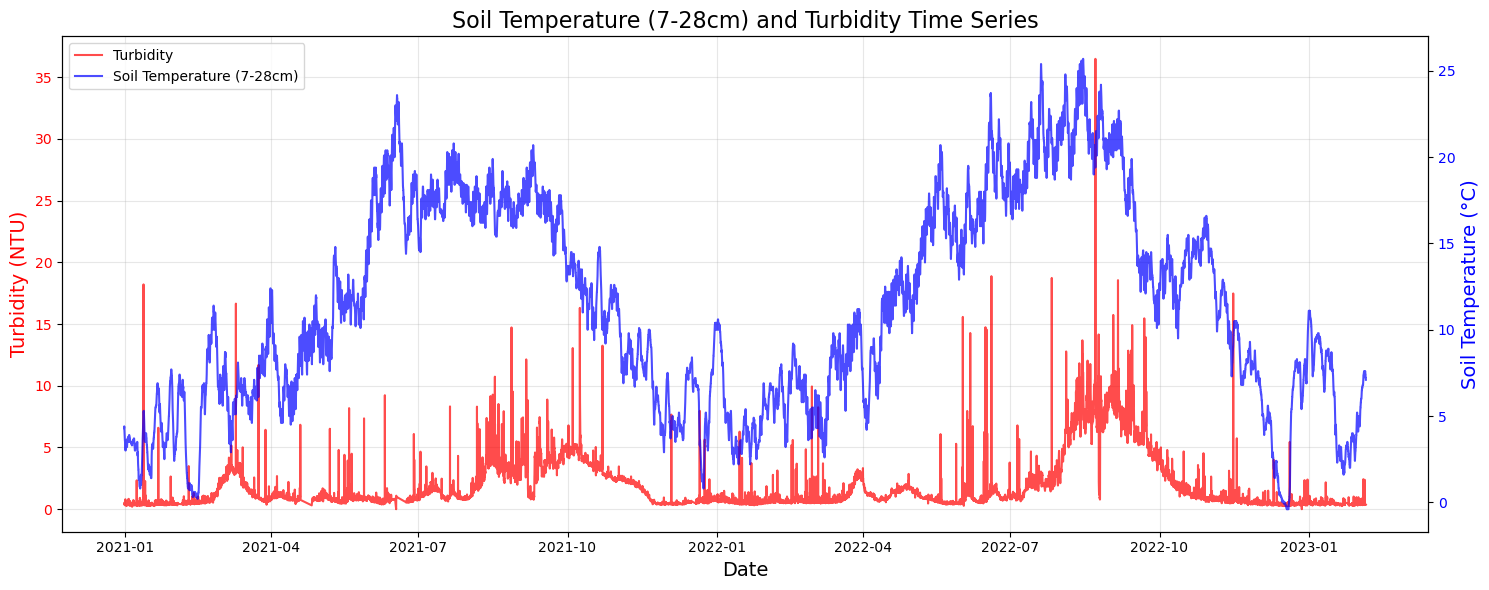

In [39]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['soil_temperature_7_to_28cm (°C)'], alpha=0.7, color='blue', label='Soil Temperature (7-28cm)')
ax2.set_ylabel('Soil Temperature (°C)', fontsize=14, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legends
plt.title('Soil Temperature (7-28cm) and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

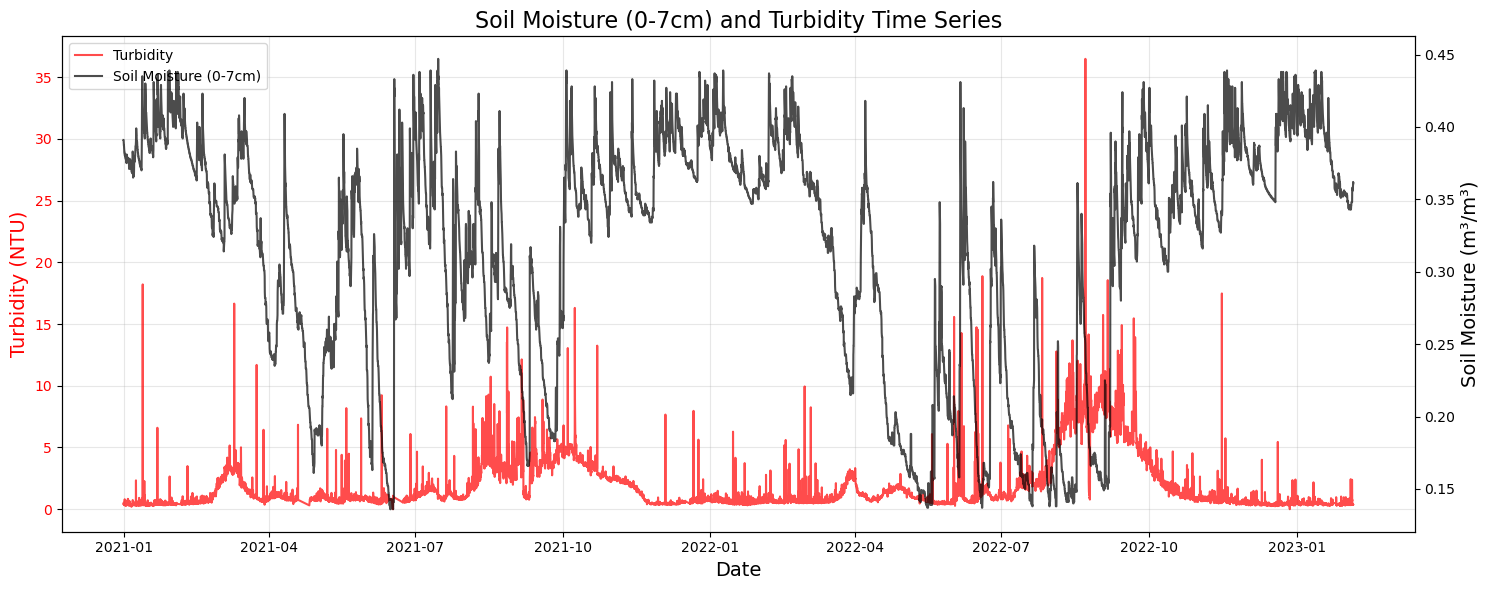

In [40]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['soil_moisture_0_to_7cm (m³/m³)'], alpha=0.7, color='black', label='Soil Moisture (0-7cm)')
ax2.set_ylabel('Soil Moisture (m³/m³)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and legends
plt.title('Soil Moisture (0-7cm) and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

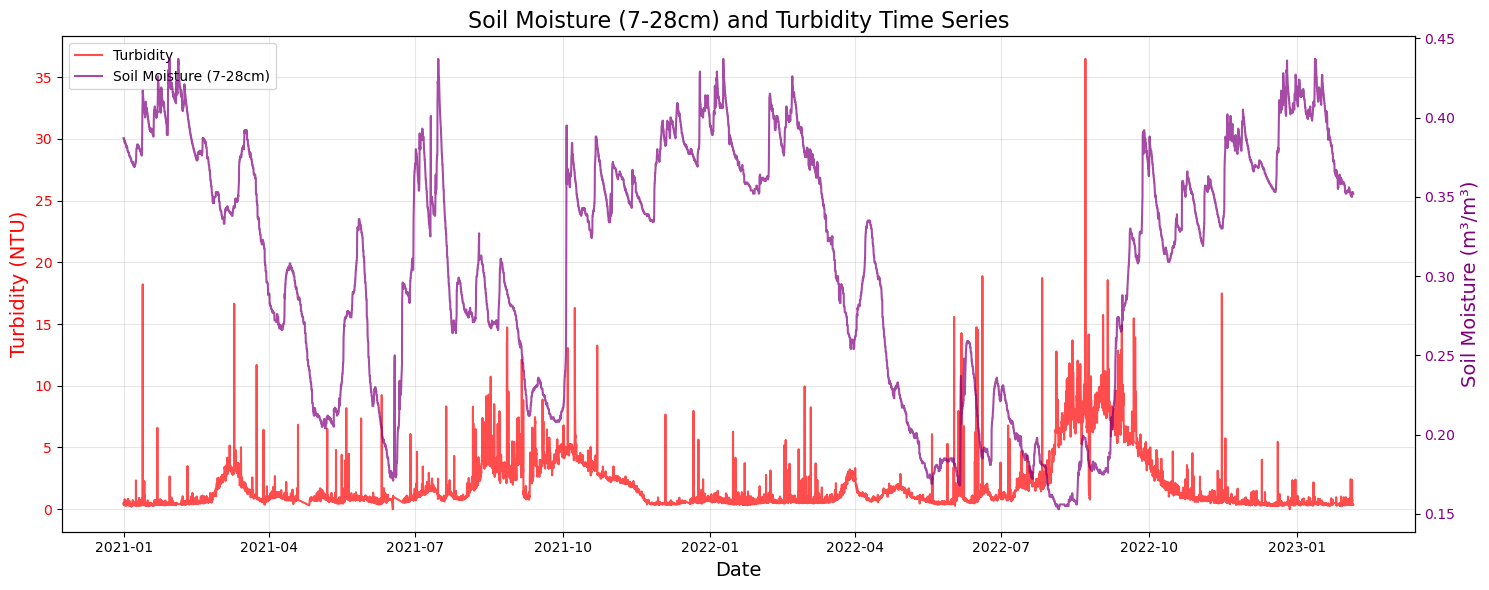

In [41]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['soil_moisture_7_to_28cm (m³/m³)'], alpha=0.7, color='purple', label='Soil Moisture (7-28cm)')
ax2.set_ylabel('Soil Moisture (m³/m³)', fontsize=14, color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add title and legends
plt.title('Soil Moisture (7-28cm) and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

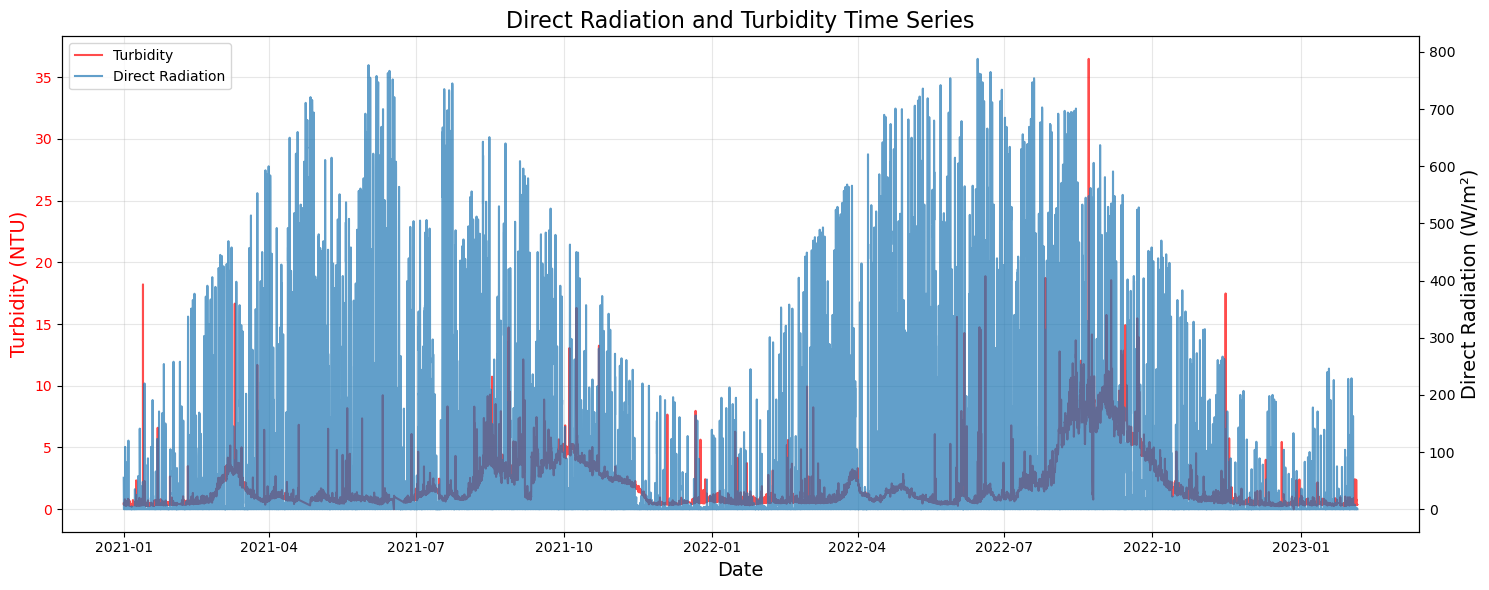

In [42]:
# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot turbidity on the primary axis (left y-axis)
ax1.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], alpha=0.7, color='red', label='Turbidity')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Turbidity (NTU)', fontsize=14, color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(alpha=0.3)

# Create a secondary axis (right y-axis) for temperature
ax2 = ax1.twinx()
ax2.plot(train_data.index, train_data['direct_radiation (W/m²)'], alpha=0.7, label='Direct Radiation')
ax2.set_ylabel('Direct Radiation (W/m²)', fontsize=14, color='black')
ax2.tick_params(axis='y')


# Add title and legends
plt.title('Direct Radiation and Turbidity Time Series', fontsize=16)

# Create a single legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout
fig.tight_layout()
plt.show()

In [43]:
Update_data.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)',
       'rain (mm)', 'et0_fao_evapotranspiration (mm)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_moisture_0_to_7cm (m³/m³)', 'soil_moisture_7_to_28cm (m³/m³)',
       'direct_radiation (W/m²)', 'FLT GEM Turb influent oneven'],
      dtype='object')

# Decomposition

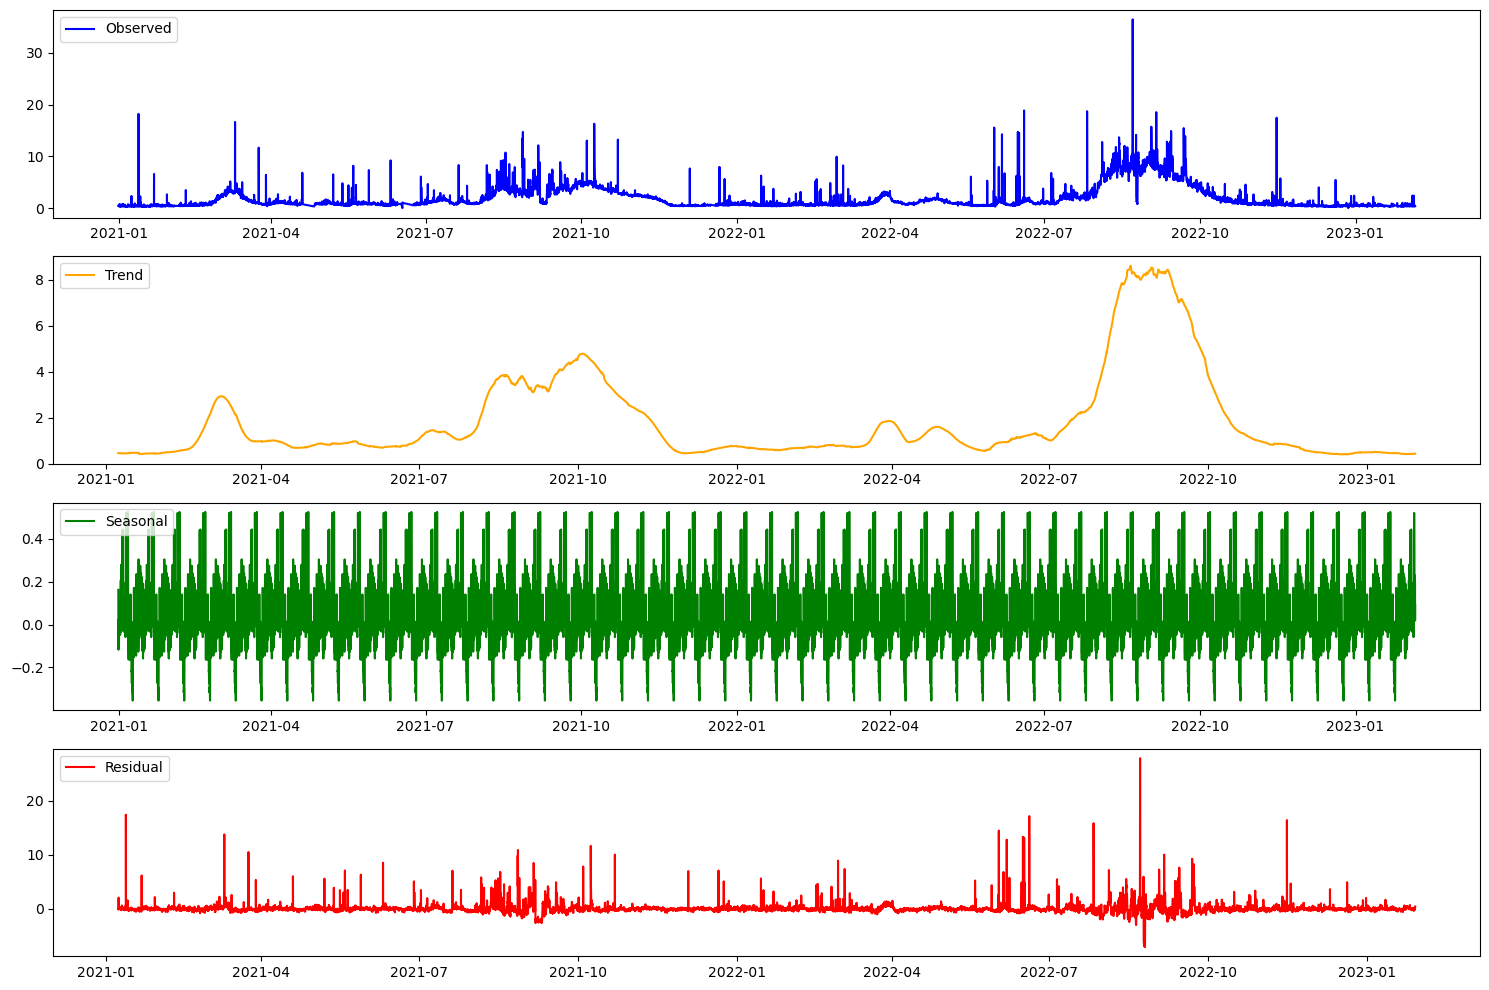

In [44]:
# Decompose the time series using additive model
result_add = seasonal_decompose(train_data['FLT GEM Turb influent oneven'], model='additive', period=365)
# plot the components of the additive decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(result_add.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_add.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_add.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_add.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


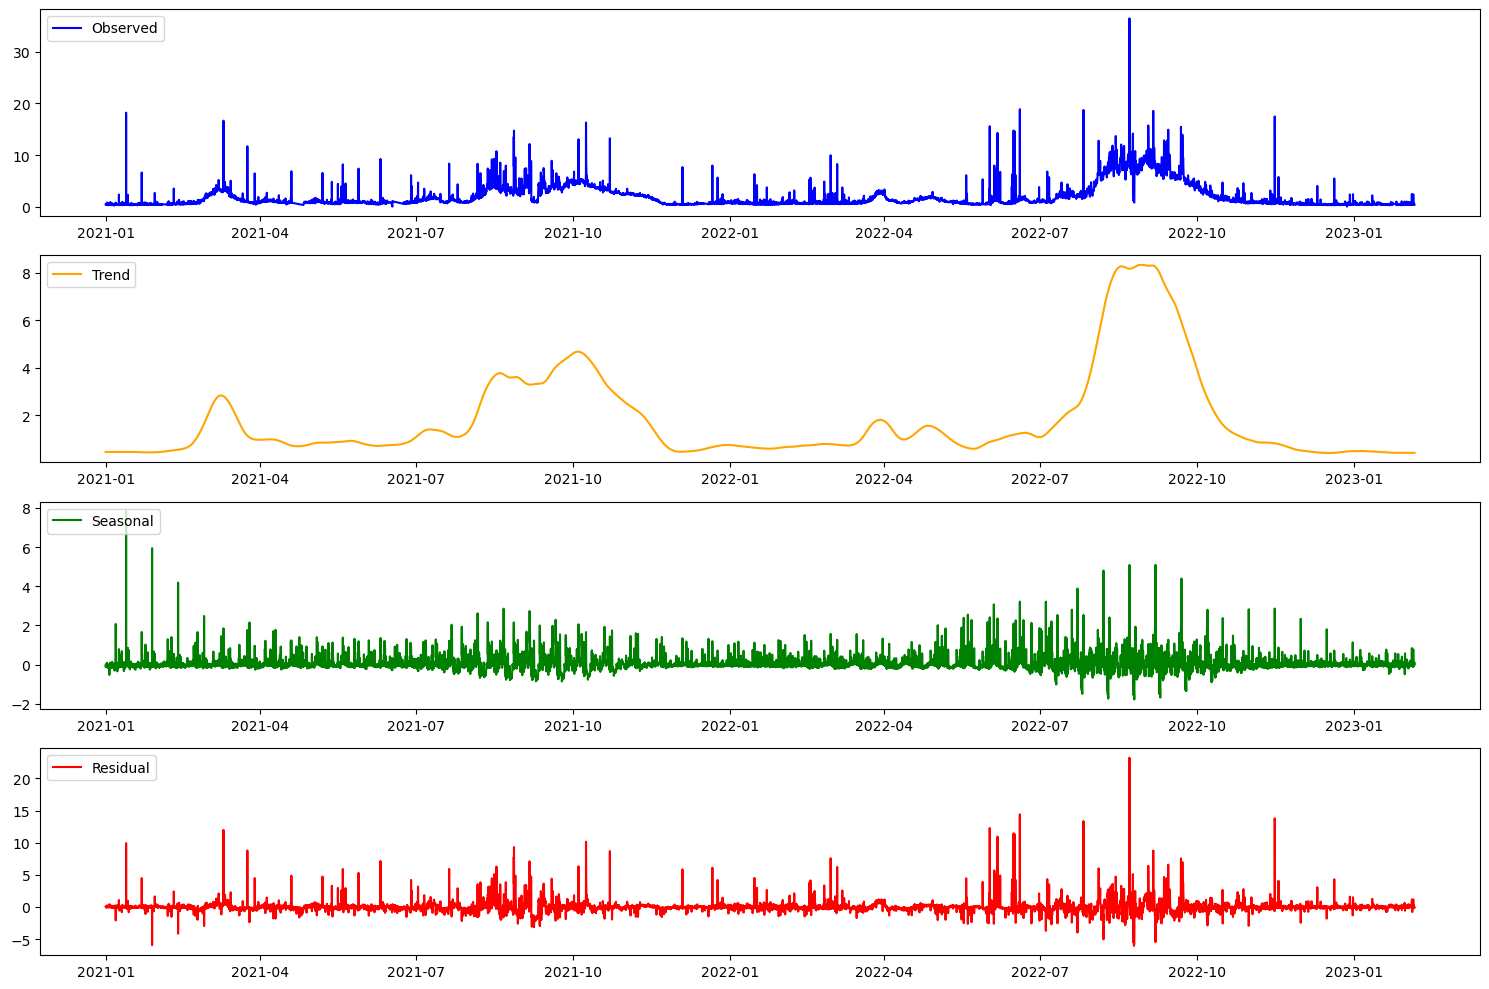

In [45]:
# Decompose the time series using STL method
stl = STL(train_data['FLT GEM Turb influent oneven'], seasonal=11, period=365)
result_stl = stl.fit()
# plot the components of the STL decomposition
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(result_stl.observed, label='Observed', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result_stl.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result_stl.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result_stl.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Baseline models

## Historical Mean Baseline Model

In [218]:
mean_value = train_data['FLT GEM Turb influent oneven'].mean()
print(mean_value)



1.8095906656937457


In [222]:
# Predict mean for test sets
test_preds_his_mean = np.full(len(test_data), mean_value)

# Actual values
test_true = test_data['FLT GEM Turb influent oneven'].values


In [226]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to compute all metrics
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE (%)': mape}

# Evaluate
test_metrics_his_mean = evaluate_metrics(test_true, test_preds_his_mean)

# Display
print("\nTest Set Metrics for Historical Mean Baseline Model:")
for metric, value in test_metrics_his_mean.items():
    print(f"{metric}: {value:.4f}")




Test Set Metrics for Historical Mean Baseline Model:
MAE: 1.6583
MSE: 4.9107
RMSE: 2.2160
R2: -0.0226
MAPE (%): 152.2940


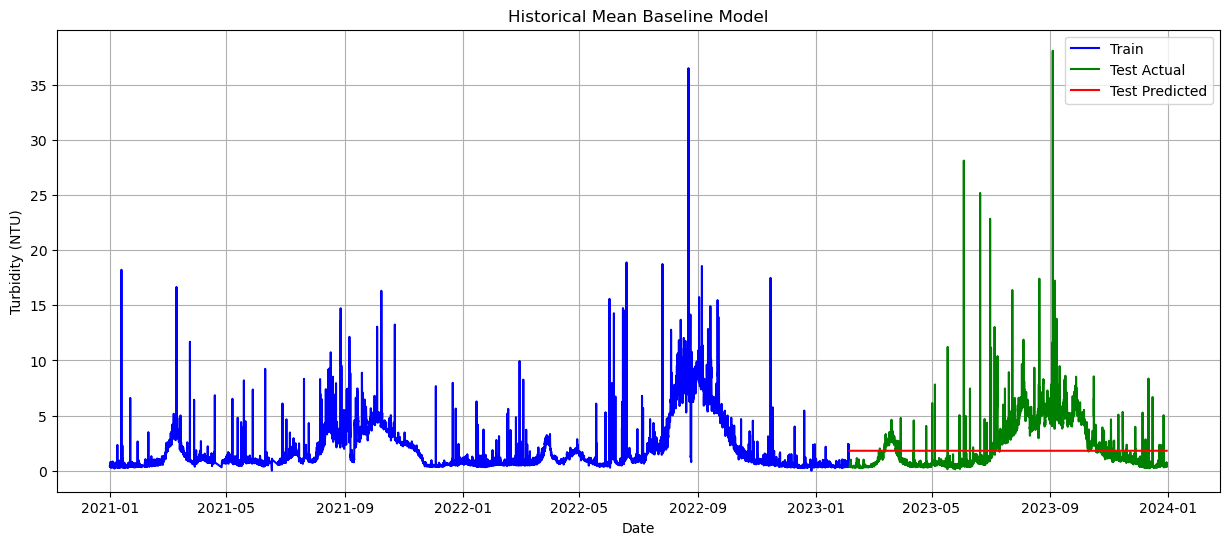

In [228]:
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(test_data.index, test_true, label='Test Actual', color='green')
plt.plot(test_data.index, test_preds_his_mean, label='Test Predicted', color='red')
plt.title('Historical Mean Baseline Model')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()



## Last Observation Baseline Model

In [229]:
last = train_data['FLT GEM Turb influent oneven'].iloc[-1]
print(last)

0.3692680904761905


In [231]:
# Predict the last know value for the test set
test_preds_last = np.full(len(test_data), last)

# Actual values
test_true = test_data['FLT GEM Turb influent oneven'].values


In [232]:
# Evaluate
test_metrics_last = evaluate_metrics(test_true, test_preds_last)


In [233]:
# Display   
print("\nTest Set Metrics for Last Observation Baseline Model:")
for metric, value in test_metrics_last.items():
    print(f"{metric}: {value:.4f}")
    


Test Set Metrics for Last Observation Baseline Model:
MAE: 1.7778
MSE: 7.9340
RMSE: 2.8167
R2: -0.6521
MAPE (%): 59.4568


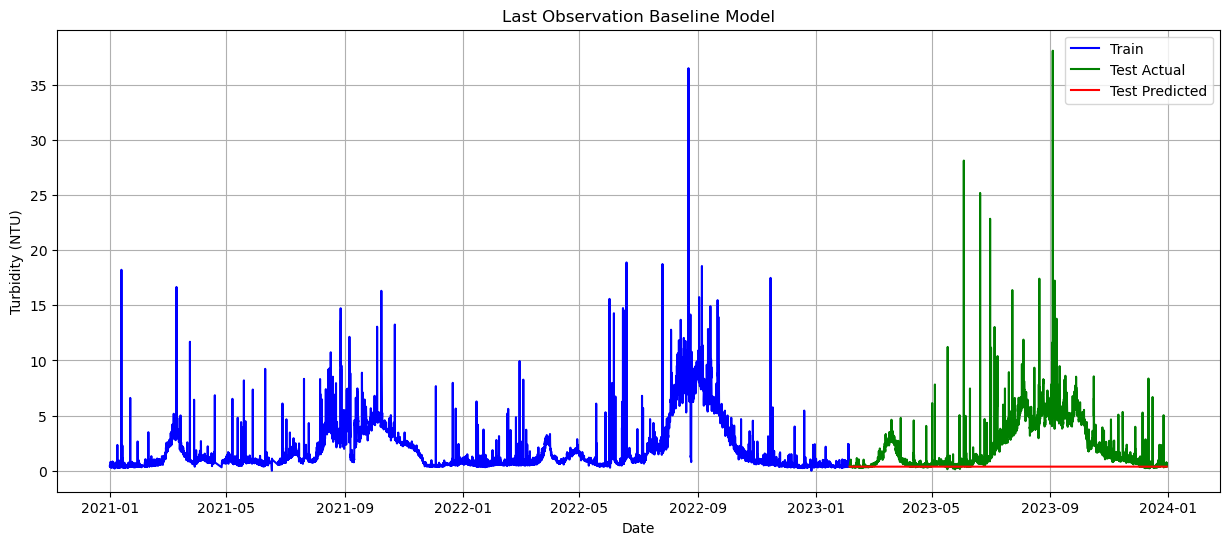

In [234]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(test_data.index, test_true, label='Test Actual', color='green')
plt.plot(test_data.index, test_preds_last, label='Test Predicted', color='red')
plt.title('Last Observation Baseline Model')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()


## Mean of the Previous Window

In [190]:
test_data.head


<bound method NDFrame.head of                      temperature_2m (°C)  relative_humidity_2m (%)  \
Date                                                                 
2023-02-05 06:00:00                  6.4                        90   
2023-02-05 07:00:00                  6.7                        92   
2023-02-05 08:00:00                  6.8                        89   
2023-02-05 09:00:00                  5.9                        86   
2023-02-05 10:00:00                  6.4                        84   
...                                  ...                       ...   
2023-12-30 05:00:00                  6.9                        90   
2023-12-30 06:00:00                  6.9                        90   
2023-12-30 07:00:00                  6.7                        91   
2023-12-30 08:00:00                  6.6                        93   
2023-12-30 09:00:00                  6.6                        93   

                     precipitation (mm)  rain (mm)  \
Date 

In [191]:
# Calculate the mean of previous time steps of the train dataset
previous_mean = train_data['FLT GEM Turb influent oneven'].loc['2022-02-05 06:00:00':'2022-12-30 09:00:00'].mean()
print(previous_mean)


2.2728397429069433


In [192]:
# Predict the mean of previous time steps for the test set
test_preds_previous_mean = np.full(len(test_data), previous_mean)
# Actual values
test_true = test_data['FLT GEM Turb influent oneven'].values
# Evaluate
test_metrics_previous_mean = evaluate_metrics(test_true, test_preds_previous_mean)
# Display
print("\nTest Set Metrics for Previous Mean Baseline Model:")
for metric, value in test_metrics_previous_mean.items():
    print(f"{metric}: {value:.4f}")



Test Set Metrics for Previous Mean Baseline Model:
MAE: 1.7804
MSE: 4.8202
RMSE: 2.1955
R2: -0.0037
MAPE (%): 197.9437


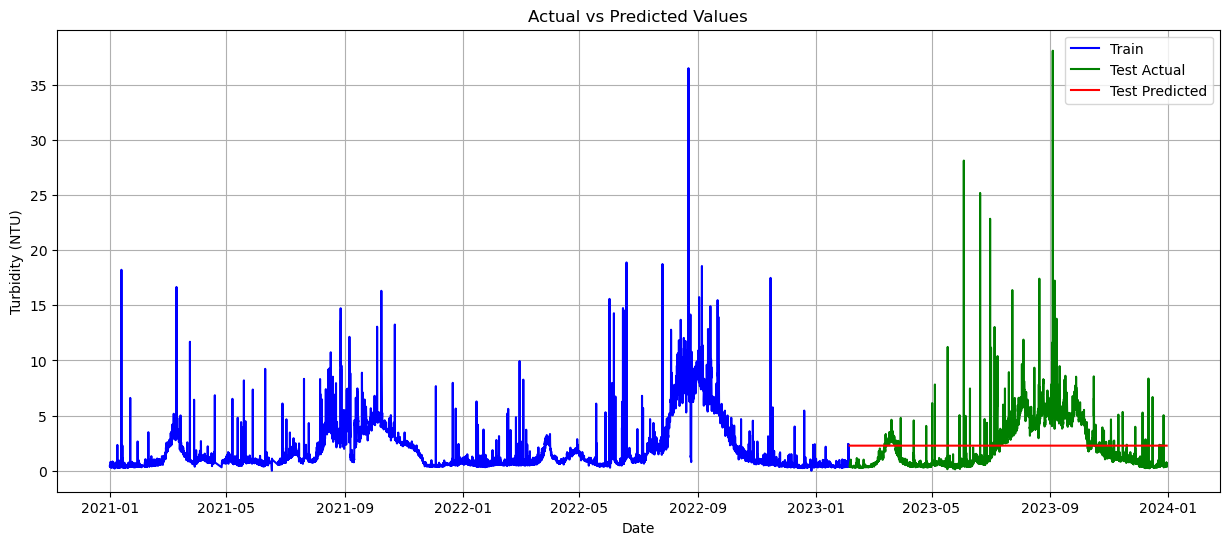

In [193]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(test_data.index, test_true, label='Test Actual', color='green')
plt.plot(test_data.index, test_preds_previous_mean, label='Test Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()


## Previous Window Baseline Model

In [198]:
test_data.head


<bound method NDFrame.head of                      temperature_2m (°C)  relative_humidity_2m (%)  \
Date                                                                 
2023-02-05 06:00:00                  6.4                        90   
2023-02-05 07:00:00                  6.7                        92   
2023-02-05 08:00:00                  6.8                        89   
2023-02-05 09:00:00                  5.9                        86   
2023-02-05 10:00:00                  6.4                        84   
...                                  ...                       ...   
2023-12-30 05:00:00                  6.9                        90   
2023-12-30 06:00:00                  6.9                        90   
2023-12-30 07:00:00                  6.7                        91   
2023-12-30 08:00:00                  6.6                        93   
2023-12-30 09:00:00                  6.6                        93   

                     precipitation (mm)  rain (mm)  \
Date 

In [203]:
# Use the last time step of the train dataset as the prediction for the test set
test_preds_previous = train_data['FLT GEM Turb influent oneven'].loc['2022-02-05 06:00:00':'2022-12-30 09:00:00'].values
# Actual values
test_true = test_data['FLT GEM Turb influent oneven'].values
# Evaluate
test_metrics_previous = evaluate_metrics(test_true, test_preds_previous)
# Display
print("\nTest Set Metrics for previous window baseline model:")
for metric, value in test_metrics_previous.items():
    print(f"{metric}: {value:.4f}")



Test Set Metrics for previous window baseline model:
MAE: 1.0857
MSE: 3.7040
RMSE: 1.9246
R2: 0.2287
MAPE (%): 64.2059


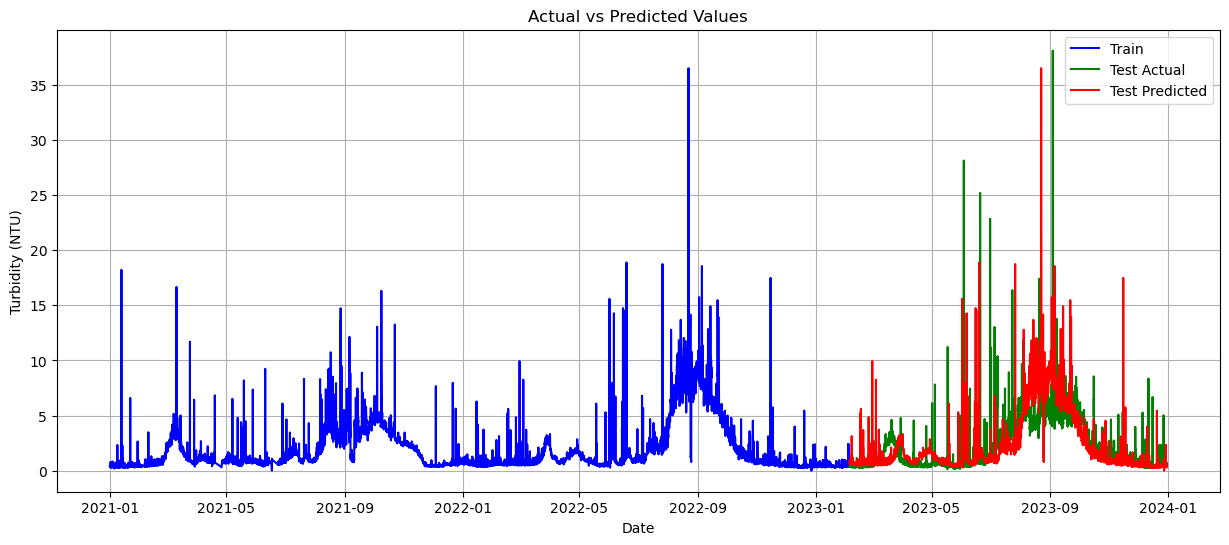

In [205]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(test_data.index, test_true, label='Test Actual', color='green')
plt.plot(test_data.index, test_preds_previous, label='Test Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Create a table to compare the metrics of all models
metrics_comparison = pd.DataFrame({
    'Model': ['Mean', 'Last Observation', 'Previous Mean', 'Previous Window'],
    'MAE': [test_metrics_his_mean['MAE'], test_metrics_last['MAE'], test_metrics_previous_mean['MAE'], test_metrics_previous['MAE']],
    'MSE': [test_metrics_his_mean['MSE'], test_metrics_last['MSE'], test_metrics_previous_mean['MSE'], test_metrics_previous['MSE']],
    'RMSE': [test_metrics_his_mean['RMSE'], test_metrics_last['RMSE'], test_metrics_previous_mean['RMSE'], test_metrics_previous['RMSE']],
    'R2': [test_metrics_his_mean['R2'], test_metrics_last['R2'], test_metrics_previous_mean['R2'], test_metrics_previous['R2']],
    'MAPE (%)': [test_metrics_his_mean['MAPE (%)'], test_metrics_last['MAPE (%)'], test_metrics_previous_mean['MAPE (%)'], test_metrics_previous['MAPE (%)']]
})
# Display the comparison table
print("\nMetrics Comparison Table:")
print(metrics_comparison.to_string(index=False))



Metrics Comparison Table:
           Model      MAE      MSE     RMSE        R2   MAPE (%)
            Mean 1.658349 4.910707 2.216012 -0.022588 152.294001
Last Observation 1.777841 7.933976 2.816731 -0.652142  59.456792
   Previous Mean 1.780374 4.820165 2.195487 -0.003733 197.943750
 Previous Window 1.085704 3.704048 1.924590  0.228683  64.205941


# Remove Outliers

## Remove Outliers Above 5 

In [682]:
# Remove outliers above 5 
train_data_cleaned_1 = train_data[train_data['FLT GEM Turb influent oneven'] <= 5]
# Check the shape of the cleaned dataset
train_data_cleaned_1.shape


(16873, 14)

In [683]:
# Replace outliers with NaN
train_data_cleaned_1 = train_data.copy()
train_data_cleaned_1.loc[train_data['FLT GEM Turb influent oneven'] > 5, 'FLT GEM Turb influent oneven'] = np.nan


In [684]:
# Interpolate the missing values in the cleaned dataset
train_data_cleaned_1['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)


C:\Users\Yin Jianing\AppData\Local\Temp\ipykernel_22496\3040772208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_cleaned_1['FLT GEM Turb influent oneven'].interpolate(method='linear', inplace=True)


In [685]:
# Check the shape of the cleaned dataset
train_data_cleaned_1.shape


(18375, 14)

In [686]:
train_data_cleaned_1['FLT GEM Turb influent oneven'].describe()


count    18375.000000
mean         1.567924
std          1.403962
min          0.000000
25%          0.572234
50%          0.898008
75%          2.158278
max          4.998582
Name: FLT GEM Turb influent oneven, dtype: float64

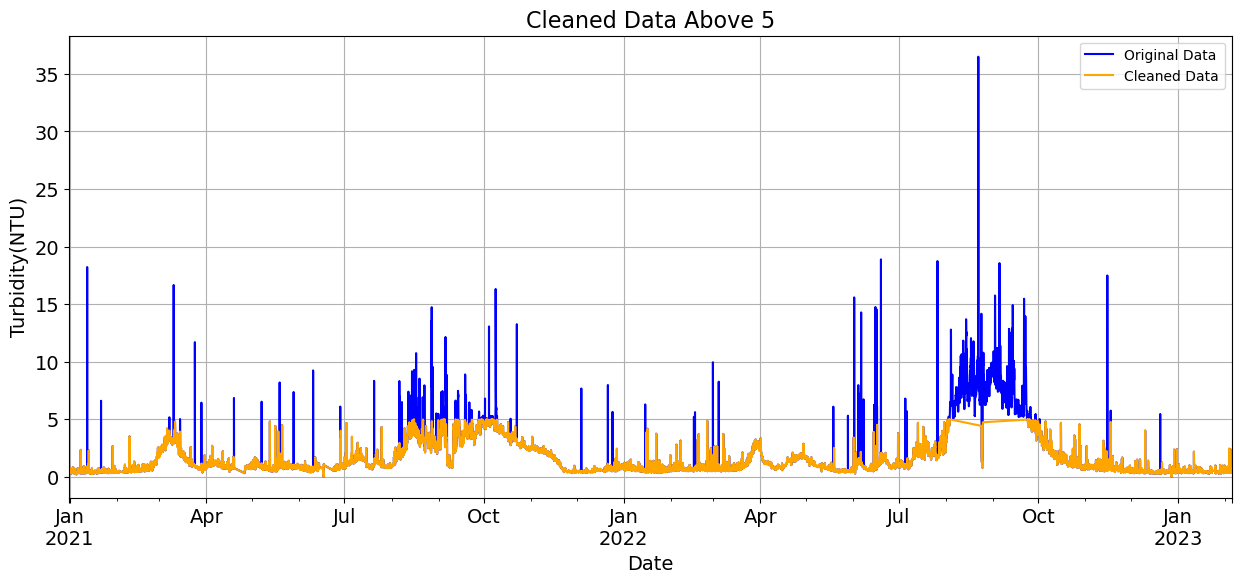

In [687]:
train_data['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, label='Original Data', color='blue')
train_data_cleaned_1['FLT GEM Turb influent oneven'].plot(figsize=(15, 6), fontsize=14, label='Cleaned Data', color='orange')
plt.title('Cleaned Data Above 5', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Turbidity(NTU)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


### Naive Mean Baseline Model

In [688]:
mean_value_cleaned_1 = train_data_cleaned_1['FLT GEM Turb influent oneven'].mean()
print(mean_value_cleaned_1)

1.5679242845983294


In [689]:
# Predict mean for validation and test sets
val_preds_mean_cleaned_1 = np.full(len(validation_data), mean_value_cleaned_1)
test_preds_mean_cleaned_1 = np.full(len(test_data), mean_value_cleaned_1)

# Actual values
val_true = validation_data['FLT GEM Turb influent oneven'].values
test_true = test_data['FLT GEM Turb influent oneven'].values

In [690]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define a function to compute all metrics
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE (%)': mape}

# Evaluate
val_metrics_mean_cleaned_1 = evaluate_metrics(val_true, val_preds_mean_cleaned_1)
test_metrics_mean_cleaned_1 = evaluate_metrics(test_true, test_preds_mean_cleaned_1)

# Display
print("Validation Dataset Metrics for Naive Mean Baseline Model:")
for metric, value in val_metrics_mean_cleaned_1.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Set Metrics for Naive Mean Baseline Model:")
for metric, value in test_metrics_mean_cleaned_1.items():
    print(f"{metric}: {value:.4f}")

Validation Dataset Metrics for Naive Mean Baseline Model:
MAE: 0.9846
MSE: 1.1393
RMSE: 1.0674
R2: -0.7441
MAPE (%): 188.8111

Test Set Metrics for Naive Mean Baseline Model:
MAE: 1.9227
MSE: 7.1224
RMSE: 2.6688
R2: -0.2561
MAPE (%): 99.5496


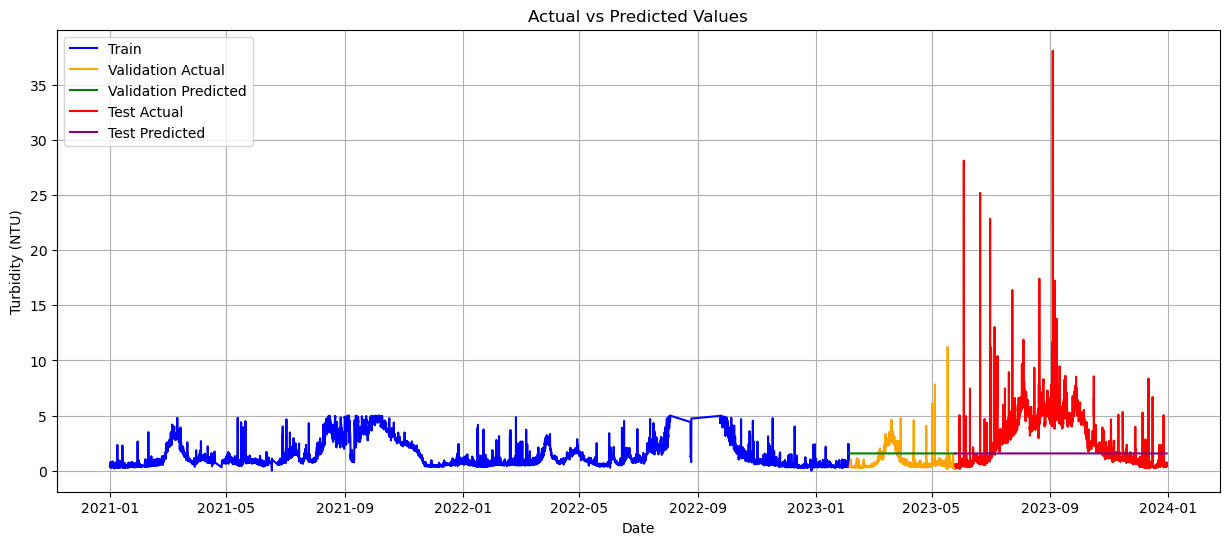

In [691]:
plt.figure(figsize=(15, 6))
plt.plot(train_data_cleaned_1.index, train_data_cleaned_1['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(validation_data.index, val_true, label='Validation Actual', color='orange')
plt.plot(validation_data.index, val_preds_mean_cleaned_1, label='Validation Predicted', color='green')
plt.plot(test_data.index, test_true, label='Test Actual', color='red')
plt.plot(test_data.index, test_preds_mean_cleaned_1, label='Test Predicted', color='purple')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()


### Last Observation Baseline Model

In [692]:
last = train_data['FLT GEM Turb influent oneven'].iloc[-1]
print(last)

0.3692680904761905


In [693]:
# Predict the last know value for the validation and test sets
val_preds_last_cleaned_1 = np.full(len(validation_data), last)
test_preds_last_cleaned_1 = np.full(len(test_data), last)

# Actual values
val_true = validation_data['FLT GEM Turb influent oneven'].values
test_true = test_data['FLT GEM Turb influent oneven'].values

In [694]:
# Evaluate
val_metrics_last_cleaned_1 = evaluate_metrics(val_true, val_preds_last_cleaned_1)
test_metrics_last_cleaned_1 = evaluate_metrics(test_true, test_preds_last_cleaned_1)

In [696]:
# Display
print("Validation Dataset Metrics for Last Observation Baseline Model:")
for metric, value in val_metrics_last_cleaned_1.items():
    print(f"{metric}: {value:.4f}")

print("\nTest Set Metrics for Last Observation Baseline Model:")
for metric, value in test_metrics_last_cleaned_1.items():
    print(f"{metric}: {value:.4f}")
    

Validation Dataset Metrics for Last Observation Baseline Model:
MAE: 0.5158
MSE: 0.9047
RMSE: 0.9512
R2: -0.3850
MAPE (%): 39.1654

Test Set Metrics for Last Observation Baseline Model:
MAE: 2.4087
MSE: 11.4479
RMSE: 3.3835
R2: -1.0189
MAPE (%): 69.6005


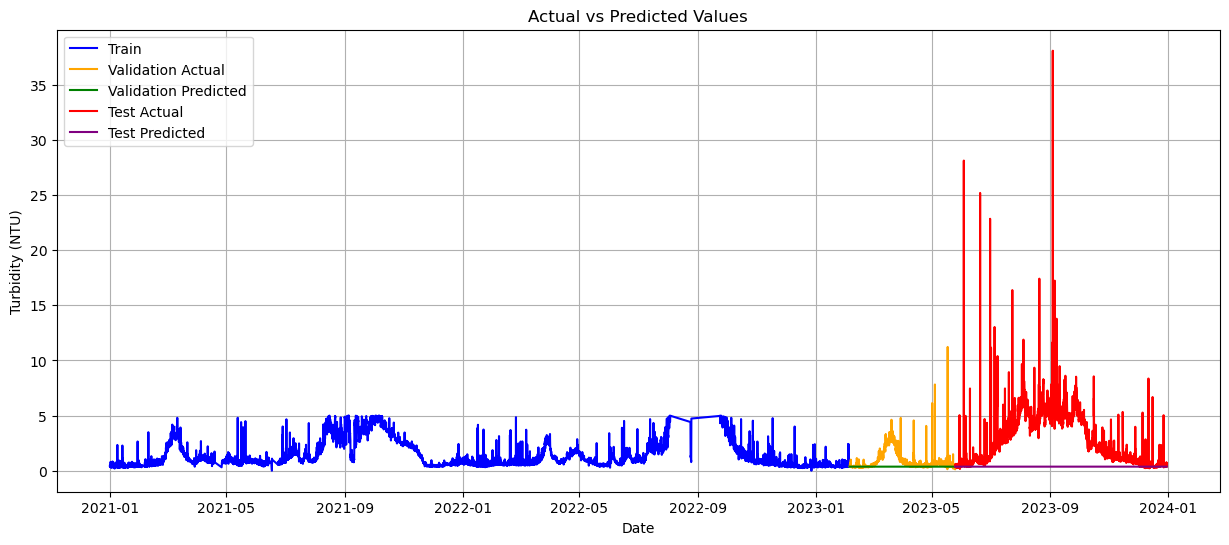

In [697]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(train_data_cleaned_1.index, train_data_cleaned_1['FLT GEM Turb influent oneven'], label='Train', color='blue')
plt.plot(validation_data.index, val_true, label='Validation Actual', color='orange')
plt.plot(validation_data.index, val_preds_last_cleaned_1, label='Validation Predicted', color='green')
plt.plot(test_data.index, test_true, label='Test Actual', color='red')
plt.plot(test_data.index, test_preds_last_cleaned_1, label='Test Predicted', color='purple')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid()
plt.show()

In [698]:
# display the metrics for validation and test sets for the two methods
print("Validation Dataset Metrics for Naive Mean Baseline Model:")
for metric, value in val_metrics_mean_cleaned_1.items():
    print(f"{metric}: {value:.4f}")
print("\nTest Dataset Metrics for Naive Mean Baseline Model:")
for metric, value in test_metrics_mean_cleaned_1.items():
    print(f"{metric}: {value:.4f}")

# display the metrics for validation and test sets for the two methods
print("\nValidation Dataset Metrics for Last Observation Baseline Model:")
for metric, value in val_metrics_last_cleaned_1.items():
    print(f"{metric}: {value:.4f}")
print("\nTest Dataset Metrics for Last Observation Baseline Model:")
for metric, value in test_metrics_last_cleaned_1.items():
    print(f"{metric}: {value:.4f}")

# Create a table to compare the metrics of the two methods
metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'MAPE (%)'],
    'Naive Mean Baseline Model (Validation)': [val_metrics_mean_cleaned_1['MAE'], val_metrics_mean_cleaned_1['MSE'], val_metrics_mean_cleaned_1['RMSE'], val_metrics_mean_cleaned_1['R2'], val_metrics_mean_cleaned_1['MAPE (%)']],
    'Naive Mean Baseline Model (Test)': [test_metrics_mean_cleaned_1['MAE'], test_metrics_mean_cleaned_1['MSE'], test_metrics_mean_cleaned_1['RMSE'], test_metrics_mean_cleaned_1['R2'], test_metrics_mean_cleaned_1['MAPE (%)']],
    'Last Observation Baseline Model (Validation)': [val_metrics_last_cleaned_1['MAE'], val_metrics_last_cleaned_1['MSE'], val_metrics_last_cleaned_1['RMSE'], val_metrics_last_cleaned_1['R2'], val_metrics_last_cleaned_1['MAPE (%)']],
    'Last Observation Baseline Model (Test)': [test_metrics_last_cleaned_1['MAE'], test_metrics_last_cleaned_1['MSE'], test_metrics_last_cleaned_1['RMSE'], test_metrics_last_cleaned_1['R2'], test_metrics_last_cleaned_1['MAPE (%)']]
})
metrics.set_index('Metric', inplace=True)
# Display the metrics table
metrics

Validation Dataset Metrics for Naive Mean Baseline Model:
MAE: 0.9846
MSE: 1.1393
RMSE: 1.0674
R2: -0.7441
MAPE (%): 188.8111

Test Dataset Metrics for Naive Mean Baseline Model:
MAE: 1.9227
MSE: 7.1224
RMSE: 2.6688
R2: -0.2561
MAPE (%): 99.5496

Validation Dataset Metrics for Last Observation Baseline Model:
MAE: 0.5158
MSE: 0.9047
RMSE: 0.9512
R2: -0.3850
MAPE (%): 39.1654

Test Dataset Metrics for Last Observation Baseline Model:
MAE: 2.4087
MSE: 11.4479
RMSE: 3.3835
R2: -1.0189
MAPE (%): 69.6005


,Naive Mean Baseline Model (Validation),Naive Mean Baseline Model (Test),Last Observation Baseline Model (Validation),Last Observation Baseline Model (Test)
Metric,,,,
MAE,0.984577,1.922716,0.515785,2.408748
MSE,1.139281,7.122423,0.904712,11.447938
RMSE,1.067371,2.668787,0.951163,3.383480
R2,-0.744078,-0.256066,-0.384986,-1.018887
MAPE (%),188.811085,99.549606,39.165450,69.600532


## Remove Outliers Above 7.5

# Daily Frequency